## Finding Communities in a graph (Brute Force Method)

In [1]:
import networkx as nx
import itertools

### Function to find communities in a graph

In [13]:
def communities_brute(G):
    nodes = G.nodes()
    n = G.number_of_nodes()

    first_community = []
    # Find all possible combiinatins of communities,
    # when first community has 1 & second has n - 1 nodes, first has 2 & second has n - 2 nodes, etc.
    for i in range(1, n//2 + 1):
        comb = [list(x) for x in itertools.combinations(nodes, i)]
        first_community.extend(comb)
    
    second_community = []
    # For each first community, find the second community
    for i in range(len(first_community)):
        l = list(set(nodes) - set(first_community[i]))
        second_community.append(l)

    # find which community is best
    num_intra_edges1 = []
    num_intra_edges2 = []
    num_inter_edges = []

    ratio = []

    # Find intra edges of first communities
    for i in range(len(first_community)):
        num_intra_edges1.append(G.subgraph(first_community[i]).number_of_edges())

    # Find intra edges of second communities
    for i in range(len(second_community)):
        num_intra_edges2.append(G.subgraph(second_community[i]).number_of_edges())
    
    e = G.number_of_edges()

    for i in range(len(num_intra_edges1)):
        interEdges = e - num_intra_edges1[i] - num_intra_edges2[i]
        num_inter_edges.append(interEdges)
    
    # Find the ratio
    for i in range(len(num_intra_edges1)):
        r = float((num_intra_edges1[i] + num_intra_edges2[i]) / num_inter_edges[i])
        ratio.append(r)
    
    # Find the best ratio
    max_ratio = max(ratio)
    max_index = ratio.index(max_ratio)

    # Print the communities
    print("First Community:)")
    print(first_community[max_index])
    print("Second Community:)")
    print(second_community[max_index])
    return

### Barbell Graph

In [4]:
import matplotlib.pyplot as plt

In [18]:
# A graph with two communities having 4 nodes each, joined by a path having 1 node
G2 = nx.barbell_graph(4, 1)

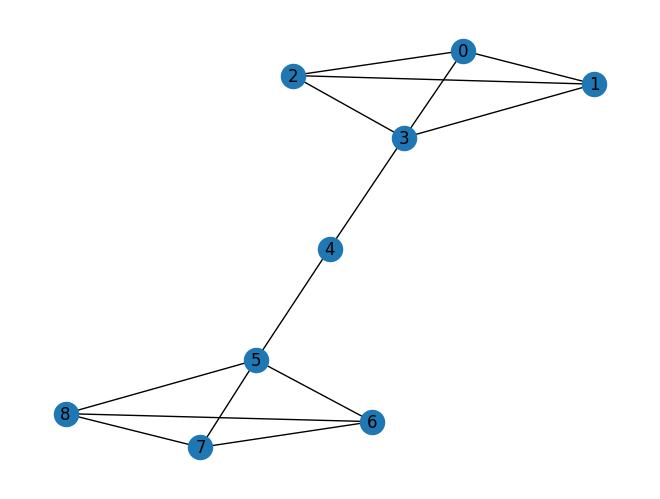

In [16]:
nx.draw(G2, with_labels=True)

### Testing the function

In [11]:
# A graph having two communites with 5 nodes, joined by a single path having 0 nodes
G = nx.barbell_graph(5, 0)

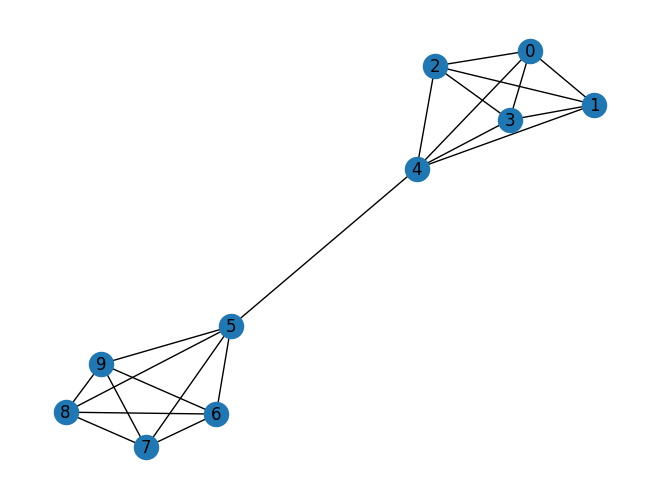

In [17]:
nx.draw(G, with_labels=True)

In [14]:
communities_brute(G)

First Community:)
[0, 1, 2, 3, 4]
Second Community:)
[5, 6, 7, 8, 9]
